In [1]:
%matplotlib widget

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [3]:
# Load the file
who_csv = Path('../Resources/WHO-COVID-19-global-data.csv')
layoff_csv = Path('../Resources/layoff_2021.csv')
quit_csv = Path('../Resources/quit_2021.csv')

# layoff and quit csv are from the Bureau of Labor

# Read data sets for new deaths, layoffs, and voluntary withdrawl
who_data = pd.read_csv(who_csv)
layoff_data = pd.read_csv(layoff_csv)
quit_data = pd.read_csv(quit_csv)

In [4]:
# Convert 'Date_reported' to datetime format
who_data['Date_reported'] = pd.to_datetime(who_data['Date_reported'])

# Extract 'Year' and 'Month' from 'Date_reported'
who_data['Year'] = who_data['Date_reported'].dt.year
who_data['Month'] = who_data['Date_reported'].dt.month

# Now, proceed with the grouping as before
monthly_covid = who_data.groupby(['Year', 'Month'])[['New_cases', 'New_deaths']].sum().reset_index()


In [5]:
# Extracting month number from 'Period' and creating a new 'Month' column
layoff_data['Month'] = layoff_data['Period'].str[1:].astype(int)
quit_data['Month'] = quit_data['Period'].str[1:].astype(int)


In [6]:
# Merge with layoff_data
merged_with_layoff = pd.merge(monthly_covid, layoff_data, on=['Year', 'Month'], how='inner', suffixes=('', '_layoff'))

# Merge the result with quit_data
final_merged = pd.merge(merged_with_layoff, quit_data, on=['Year', 'Month'], how='inner', suffixes=('', '_quit'))

final_merged.head()


,Year,Month,New_cases,New_deaths,Series id,Period,Value,Series id_quit,Period_quit,Value_quit
0,2020,1,9843,219,LNS13023653,M01,607,LNS13023705,M01,835
1,2020,2,75364,2717,LNS13023653,M02,776,LNS13023705,M02,766
2,2020,3,696287,40577,LNS13023653,M03,2094,LNS13023705,M03,709
3,2020,4,2223610,193612,LNS13023653,M04,18015,LNS13023705,M04,549
4,2020,5,2887311,164397,LNS13023653,M05,15298,LNS13023705,M05,546


In [7]:
final_merged_2021 = final_merged[final_merged['Year'] == 2021]

final_merged_2021


,Year,Month,New_cases,New_deaths,Series id,Period,Value,Series id_quit,Period_quit,Value_quit
12,2021,1,20050708,444806,LNS13023653,M01,2705,LNS13023705,M01,654
13,2021,2,11018248,303147,LNS13023653,M02,2259,LNS13023705,M02,707
14,2021,3,14179239,278881,LNS13023653,M03,2086,LNS13023705,M03,769
15,2021,4,21966967,370660,LNS13023653,M04,2072,LNS13023705,M04,819
16,2021,5,20504451,387903,LNS13023653,M05,1829,LNS13023705,M05,786
17,2021,6,11398797,268886,LNS13023653,M06,1814,LNS13023705,M06,944
18,2021,7,15575092,268921,LNS13023653,M07,1220,LNS13023705,M07,926
19,2021,8,20090027,308566,LNS13023653,M08,1213,LNS13023705,M08,827
20,2021,9,16038595,256747,LNS13023653,M09,1094,LNS13023705,M09,789
21,2021,10,13500729,219349,LNS13023653,M10,1026,LNS13023705,M10,844


In [8]:
final_merged_2021.columns

Index(['Year', 'Month', 'New_cases', 'New_deaths', 'Series id', 'Period',
       'Value', 'Series id_quit', 'Period_quit', 'Value_quit'],
      dtype='object')

In [9]:
# Rename headers
new_headers = {
    "New_cases": "New Cases",
    "New_deaths": "New Deaths",
    "Value": "Number of Laid-Off",
    "Value_quit": "Number of Quit"
    }

final_merged_2021 = final_merged_2021.rename(columns=new_headers)


In [10]:
# Select only the desired columns
filtered_final_merged_2021 = final_merged_2021[['Year', 'Month', 'New Cases', 'New Deaths', 'Number of Laid-Off', 'Number of Quit']]

filtered_final_merged_2021 = filtered_final_merged_2021.set_index('Month')

# Display the filtered dataframe
filtered_final_merged_2021.head()


,Year,New Cases,New Deaths,Number of Laid-Off,Number of Quit
Month,,,,,
1,2021,20050708,444806,2705,654
2,2021,11018248,303147,2259,707
3,2021,14179239,278881,2086,769
4,2021,21966967,370660,2072,819
5,2021,20504451,387903,1829,786


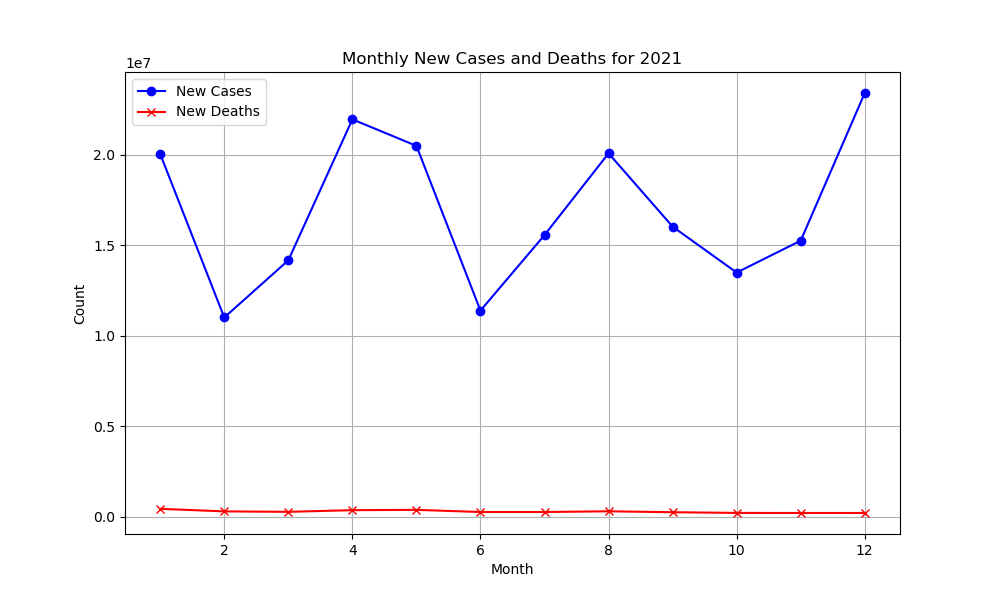

In [11]:
months = filtered_final_merged_2021.index

# Plotting New Cases and New Deaths
plt.figure(figsize=(10, 6))
plt.plot(months, filtered_final_merged_2021['New Cases'], marker = "o", label='New Cases', color='blue')
plt.plot(months, filtered_final_merged_2021['New Deaths'], marker = "x", label='New Deaths', color='red')
plt.title('Monthly New Cases and Deaths for 2021')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

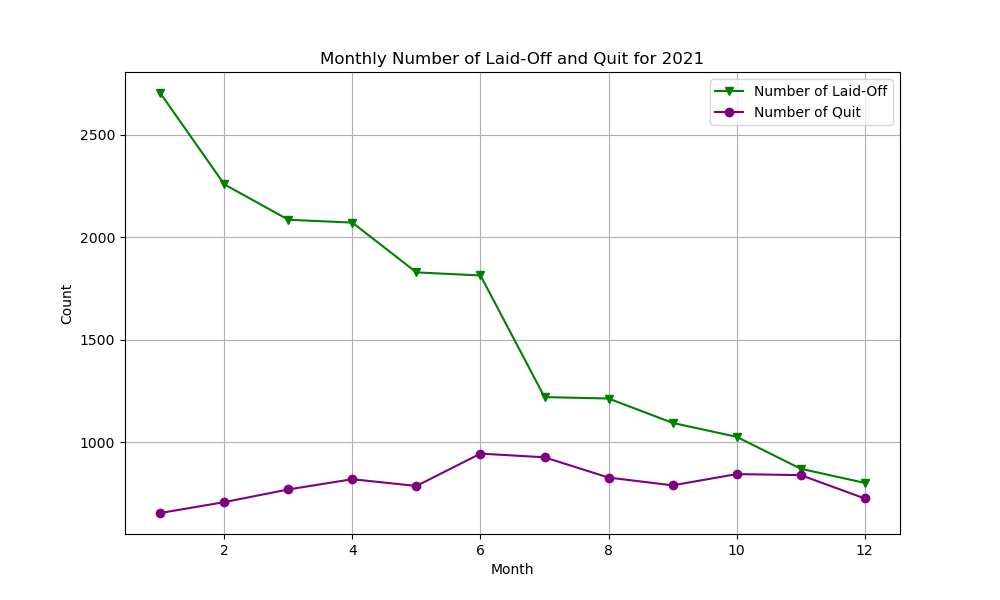

In [12]:
# Plotting Number of Laid-Off and Number of Quit
plt.figure(figsize=(10, 6))
plt.plot(months, filtered_final_merged_2021['Number of Laid-Off'], marker = "v", label='Number of Laid-Off', color='green')
plt.plot(months, filtered_final_merged_2021['Number of Quit'], marker = "o", label='Number of Quit', color='purple')
plt.title('Monthly Number of Laid-Off and Quit for 2021')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

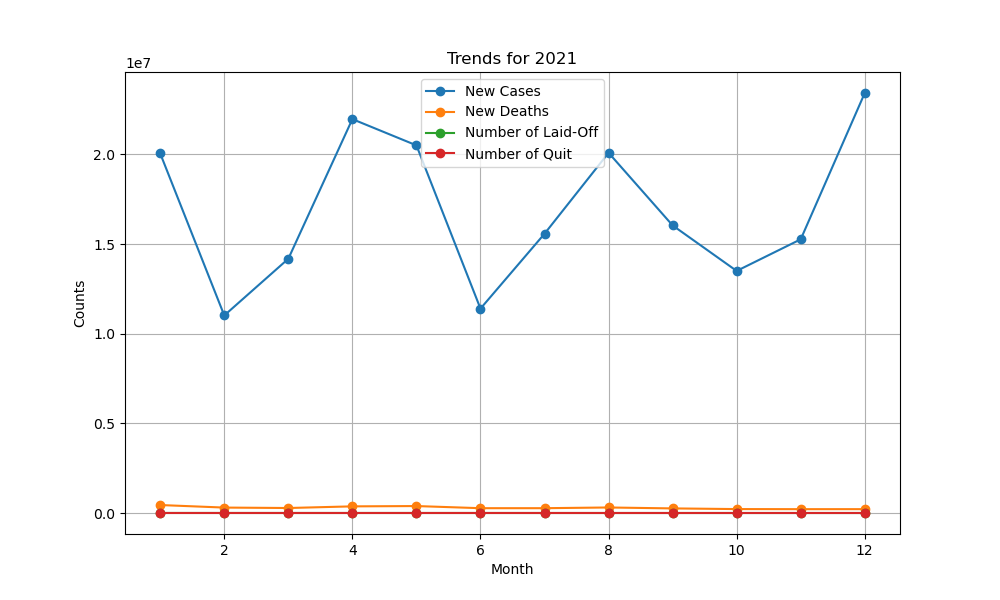

In [13]:
# Trending for 2021 
filtered_final_merged_2021.plot(y=['New Cases', 'New Deaths', 'Number of Laid-Off', 'Number of Quit'], kind='line', figsize=(10, 6), marker='o')
plt.title("Trends for 2021")
plt.ylabel("Counts")
plt.grid(True)
plt.show()

In [15]:
# Correlation between variables 
filtered_final_merged_2021[['New Cases', 'New Deaths','Number of Laid-Off', 'Number of Quit']].corr()


,New Cases,New Deaths,Number of Laid-Off,Number of Quit
New Cases,1.000000,0.391262,-0.071525,-0.350358
New Deaths,0.391262,1.000000,0.808813,-0.424472
Number of Laid-Off,-0.071525,0.808813,1.000000,-0.428899
Number of Quit,-0.350358,-0.424472,-0.428899,1.000000


In [16]:
# Aggregate 
filtered_final_merged_2021[['New Cases', 'New Deaths', 'Number of Laid-Off', 'Number of Quit']].sum()



New Cases             203011890
New Deaths              3537186
Number of Laid-Off        18989
Number of Quit             9629
dtype: int64

In [17]:
# Find the highest new cases in months
max_cases_month = filtered_final_merged_2021['New Cases'].idxmax()
print(f"Month with highest new cases: {max_cases_month}")


Month with highest new cases: 12


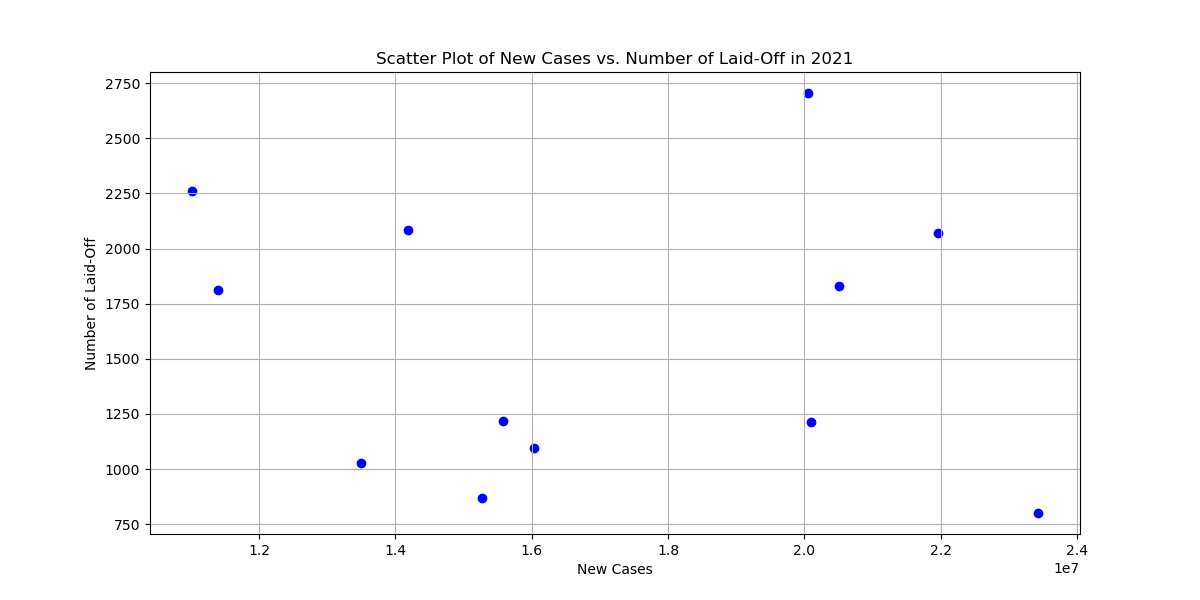

In [18]:
# Scatter plot of new cases vs laid-off
plt.figure(figsize=(12, 6))
plt.scatter(filtered_final_merged_2021['New Cases'], filtered_final_merged_2021['Number of Laid-Off'], color='blue', marker='o')
plt.title("Scatter Plot of New Cases vs. Number of Laid-Off in 2021")
plt.xlabel("New Cases")
plt.ylabel("Number of Laid-Off")
plt.grid(True)
plt.show()